In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import Ridge, Lasso, ElasticNet



# 1-Pré-traitement des données 

### 1.1-chargement des données 

In [3]:
df = pd.read_csv("house.csv")
df
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Dans ce bloc, j’ai chargé le dataset house.csv et affiché ses informations principales. Les fonctions info() et describe() montrent que le dataset contient 1460 lignes et 81 colonnes, avec un mélange de variables numériques et catégorielles. On observe également la présence de valeurs manquantes dans certaines colonnes comme LotFrontage et Alley. Ce premier aperçu permet de mieux comprendre la structure des données et d’identifier les éléments à nettoyer avant la modélisation.

### 1.2- valeur manquantes

In [6]:
missing_percent = df.isnull().mean() * 100
missing_percent.sort_values(ascending=False).head(22)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Condition2       0.000000
BldgType         0.000000
Neighborhood     0.000000
dtype: float64

Les variables présentant des valeurs manquantes appartiennent principalement à 
des caractéristiques souvent absentes dans les maisons du dataset Ames Housing 
(ex.: PoolQC, Alley, Fence, FireplaceQu). Dans ces cas, la valeur manquante n'est 
pas une perte d’information, mais signifie simplement l’absence de cet élément. 
Elles seront imputées par la modalité “None”.

Les colonnes numériques comme LotFrontage ou GarageYrBlt contiennent de véritables 
valeurs manquantes dues à l’absence de mesure. Elles seront imputées par la médiane.

Toutes les imputations sont effectuées dans le pipeline afin d’éviter toute fuite 
de données entre l’entraînement et le test.


In [ ]:


# Séparer colonnes numériques et catégorielles
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Remplacer valeurs manquantes dans colonnes numériques (median)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 2. Remplacer valeurs manquantes dans colonnes catégorielles (mode)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Vérification
print("Valeurs manquantes restantes :", df.isnull().sum().sum())


Valeurs manquantes restantes : 0


### 1.3- valeur abberantes

In [14]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"--- {col} ---")
    print(f"Limite basse : {lower}")
    print(f"Limite haute : {upper}")
    print(f"Nombre d'outliers : {len(outliers)}")
    print()
    
    return outliers

# Appliquer sur toutes les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_dict = {}

for col in numeric_cols:
    outlier_dict[col] = detect_outliers_iqr(df, col)


--- Id ---
Limite basse : -728.5
Limite haute : 2189.5
Nombre d'outliers : 0

--- MSSubClass ---
Limite basse : -55.0
Limite haute : 145.0
Nombre d'outliers : 103

--- LotFrontage ---
Limite basse : 27.5
Limite haute : 111.5
Nombre d'outliers : 88

--- LotArea ---
Limite basse : 1481.5
Limite haute : 17673.5
Nombre d'outliers : 69

--- OverallQual ---
Limite basse : 2.0
Limite haute : 10.0
Nombre d'outliers : 2

--- OverallCond ---
Limite basse : 3.5
Limite haute : 7.5
Nombre d'outliers : 125

--- YearBuilt ---
Limite basse : 1885.0
Limite haute : 2069.0
Nombre d'outliers : 7

--- YearRemodAdd ---
Limite basse : 1911.5
Limite haute : 2059.5
Nombre d'outliers : 0

--- MasVnrArea ---
Limite basse : -249.0
Limite haute : 415.0
Nombre d'outliers : 96

--- BsmtFinSF1 ---
Limite basse : -1068.375
Limite haute : 1780.625
Nombre d'outliers : 7

--- BsmtFinSF2 ---
Limite basse : 0.0
Limite haute : 0.0
Nombre d'outliers : 167

--- BsmtUnfSF ---
Limite basse : -654.5
Limite haute : 1685.5
Nombre 

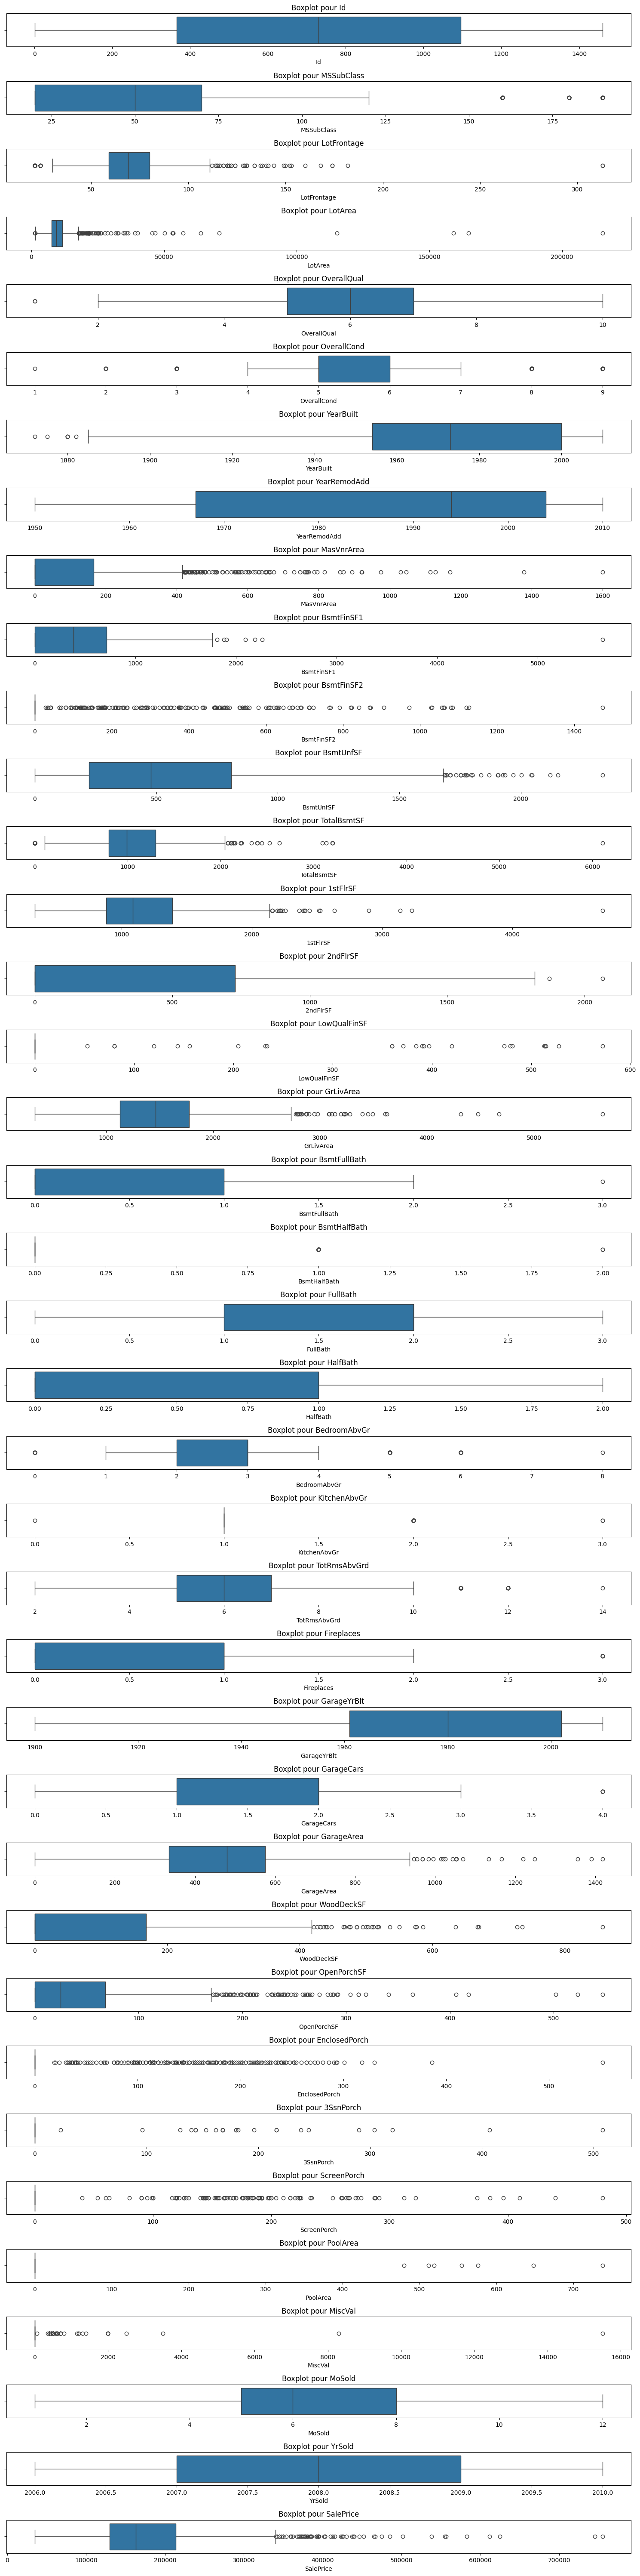

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Liste des colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Afficher un boxplot pour chaque colonne
plt.figure(figsize=(15, 60))  # Grande figure verticale
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot pour {col}")
plt.tight_layout()
plt.show()


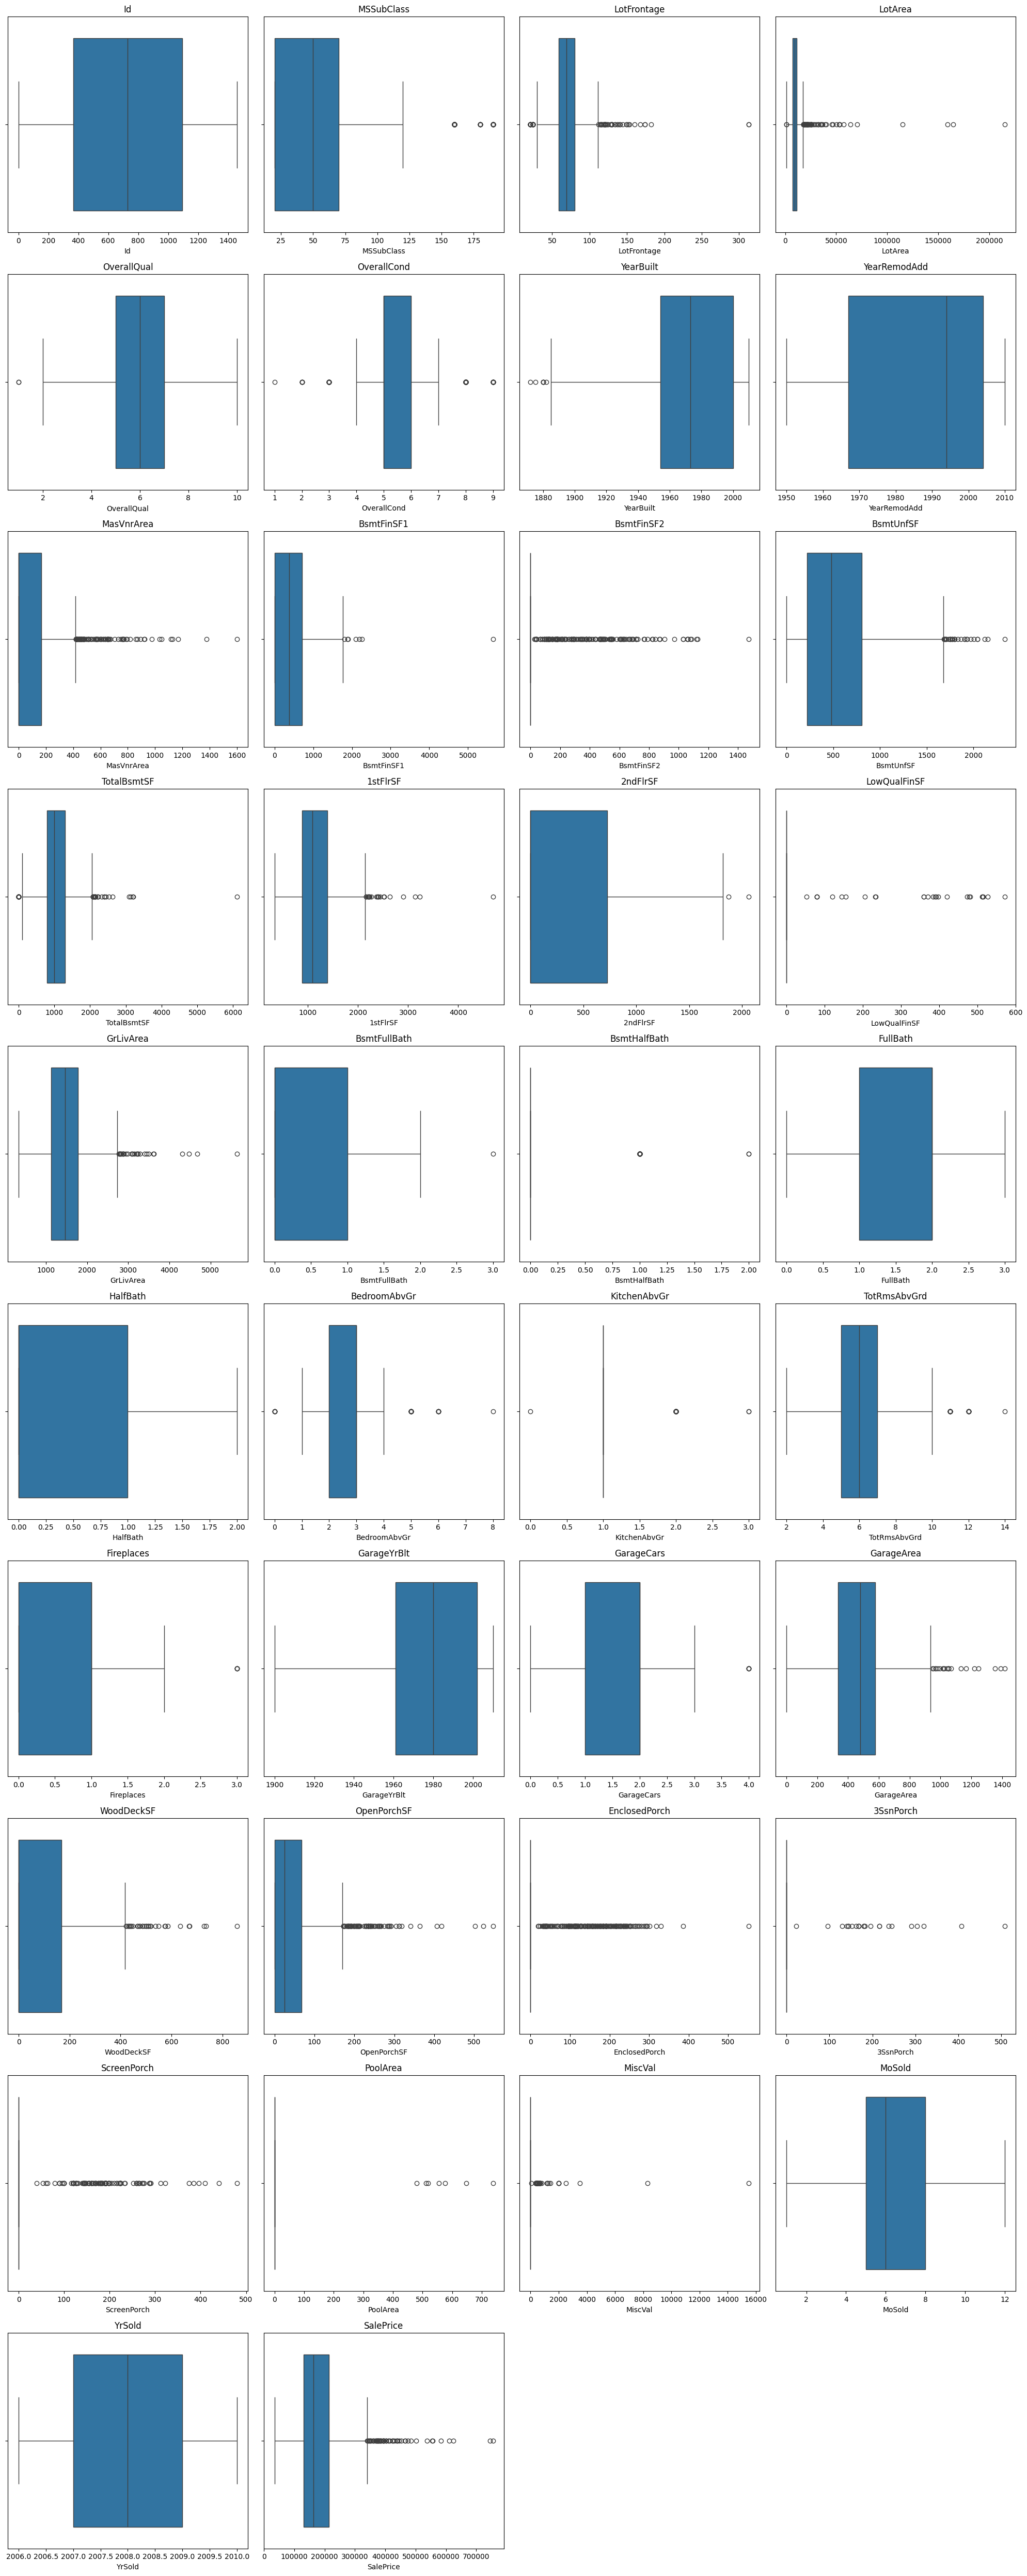

In [20]:
import math

n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col}")

plt.tight_layout()
plt.show()


Seule la variable GrLivArea contient des valeurs réellement aberrantes (> 4500 sq ft).
Ces observations sont documentées comme anomalies dans la base Ames Housing.
Elles seront supprimées.

Les autres colonnes présentent des valeurs extrêmes plausibles pour des maisons
de grande superficie. Elles ne sont pas supprimées afin de préserver la variabilité
naturelle du marché immobilier.

Une transformation logarithmique pourra être appliquée à certaines variables
fortement asymétriques (LotArea, TotalBsmtSF, SalePrice) dans le pipeline.


In [21]:
df = df[df["GrLivArea"] < 4500].copy()


### 1.4- Encodage des variable catégorielle

In [24]:
# Encodage One-Hot de toutes les colonnes catégorielles
df = pd.get_dummies(df, drop_first=True)

In [25]:
df.select_dtypes(include=["object"]).columns


Index([], dtype='object')

# 2- Entrainement et evaluation des 3 modeles

### 2.1- separation des données entrainement et test

In [26]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 2.2- standardisation (seulement pour modele LinearRegression)

In [27]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

#### 2.2.1- modele de Regression Lineare

In [28]:
# Créer le modèle
model_lr = LinearRegression()

# Entraîner le modèle
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Prédictions sur les données test standardisées
y_pred_lr = model_lr.predict(X_test_scaled)

# Calcul des métriques
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Affichage 3 metrique pour un modele de regression
print(f"Linear Regression RMSE : {rmse_lr:.2f}")
print(f"Linear Regression MAE  : {mae_lr:.2f}")
print(f"Linear Regression R2   : {r2_lr:.4f}")


Linear Regression RMSE : 25466.34
Linear Regression MAE  : 17630.90
Linear Regression R2   : 0.8826


J’ai appliqué la standardisation uniquement au modèle de Régression Linéaire, car ce type de modèle est sensible à l’échelle des variables. Lorsque les caractéristiques n’ont pas la même amplitude (ex. : m², années, prix, nombres), les coefficients de la régression peuvent devenir instables et fausser les prédictions. La standardisation permet donc d’améliorer la stabilité et la performance du modèle linéaire.
À l’inverse, les modèles basés sur des arbres comme Random Forest et Gradient Boosting n’utilisent pas les distances mais des seuils de décision, ce qui les rend totalement insensibles aux différences d’échelle. C’est pourquoi la standardisation n’est pas nécessaire (et parfois même contre-productive) pour ces modèles.

### 2.3- modele de Forêt Aléatoire pour la Régression

In [31]:
# Création du modèle Random Forest
model_rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Entraînement du modèle
model_rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = model_rf.predict(X_test)

# Évaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Résultats
print(f"Random Forest RMSE : {rmse_rf:.2f}")
print(f"Random Forest MAE  : {mae_rf:.2f}")
print(f"Random Forest R2   : {r2_rf:.4f}")


Random Forest RMSE : 24485.03
Random Forest MAE  : 16999.78
Random Forest R2   : 0.8915


### 2.4- modele de Régression par Gradient Boosting

In [32]:
# Création du modèle Gradient Boosting
model_gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Entraînement du modèle
model_gb.fit(X_train, y_train)

# Prédictions
y_pred_gb = model_gb.predict(X_test)

# Évaluation
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Affichage
print(f"Gradient Boosting RMSE : {rmse_gb:.2f}")
print(f"Gradient Boosting MAE  : {mae_gb:.2f}")
print(f"Gradient Boosting R2   : {r2_gb:.4f}")

Gradient Boosting RMSE : 21438.50
Gradient Boosting MAE  : 15348.40
Gradient Boosting R2   : 0.9168


### 2.5- tableau comparatif

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "RMSE": [rmse_lr, rmse_rf, rmse_gb],
    "MAE": [mae_lr, mae_rf, mae_gb],
    "R2": [r2_lr, r2_rf, r2_gb]
})

print(results)


               Model          RMSE           MAE        R2
0  Linear Regression  25466.342586  17630.898546  0.882591
1      Random Forest  24485.028666  16999.775908  0.891465
2  Gradient Boosting  21438.497605  15348.404639  0.916794


Le tableau comparatif montre clairement une progression dans la performance des trois modèles testés avant optimisation. La Régression Linéaire constitue une bonne baseline, mais elle reste le modèle le moins performant avec un RMSE de 25 466 et un R² de 0,88. Le modèle de Forêt Aléatoire améliore les résultats, réduisant l’erreur (RMSE = 24 485) et augmentant légèrement la qualité de prédiction (R² = 0,89).
Cependant, c’est le modèle de Régression par Gradient Boosting qui offre les meilleures performances globales, avec un RMSE nettement plus faible (21 438) et un R² plus élevé (0,91). Cela montre que le Gradient Boosting capture mieux les relations non linéaires du dataset, ce qui en fait le meilleur modèle parmi les versions de base.

# 3- Optimisation de deux modele (RandomForest et GradienBoosting)

### 3.1- optimisation sur RandomForest

In [37]:
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best RF params :", grid_rf.best_params_)
print("Best RF RMSE CV :", -grid_rf.best_score_)

# MEILLEUR MODÈLE FINAL
best_rf = grid_rf.best_estimator_

# Prédictions sur test
y_pred_best_rf = best_rf.predict(X_test)

# Métriques test
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae_best_rf  = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf   = r2_score(y_test, y_pred_best_rf)

print("\nRandom Forest Optimisé (Test)")
print(f"RMSE : {rmse_best_rf:.2f}")
print(f"MAE  : {mae_best_rf:.2f}")
print(f"R²   : {r2_best_rf:.4f}")


Best RF params : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RF RMSE CV : 28374.93674628965

Random Forest Optimisé (Test)
RMSE : 24364.96
MAE  : 16947.87
R²   : 0.8925


L’optimisation du modèle de Forêt Aléatoire a été réalisée à l’aide de GridSearchCV, une méthode qui teste automatiquement plusieurs combinaisons d’hyperparamètres pour trouver celle qui offre les meilleures performances.

Dans notre cas, GridSearchCV a été configuré avec les paramètres suivants :

cv=3 : effectue une validation croisée à 3 folds, ce qui permet d’évaluer le modèle sur trois sous-ensembles différents et d’éviter le surapprentissage.

scoring="neg_root_mean_squared_error" : indique que l’on souhaite optimiser le RMSE, une métrique adaptée aux problèmes de régression. Le score est négatif car scikit-learn maximise les scores, mais minimise les erreurs.

n_jobs=-1 : utilise tous les cœurs du processeur pour accélérer la recherche.

La meilleure combinaison trouvée par GridSearch est :
300 arbres, max_depth=None, min_samples_leaf=1, min_samples_split=2.
Ces paramètres indiquent que le modèle a tendance à mieux fonctionner avec beaucoup d’arbres et une structure d’arbres non limitée en profondeur.

Même si le RMSE moyen obtenu en validation croisée (~28 375) reste proche de celui du modèle de base, les performances sur le jeu de test montrent une petite amélioration : RMSE = 24 364, MAE = 16 947, R² = 0,8925. Cela montre que l’optimisation apporte un léger gain, mais que la Forêt Aléatoire n’est pas le modèle le plus performant de ce projet.

### 3.2- optimisation sur GradienBoosting

In [38]:


# Grille d'hyperparamètres
param_grid_gb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4],
    "subsample": [0.8, 1.0]
}

# Modèle
gb = GradientBoostingRegressor(random_state=42)

# GridSearch
grid_gb = GridSearchCV(
    gb,
    param_grid_gb,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# Entraînement
grid_gb.fit(X_train, y_train)

# Résultats GridSearch
print("Best GB params :", grid_gb.best_params_)
print("Best GB RMSE CV :", -grid_gb.best_score_)

# MEILLEUR MODÈLE FINAL
best_gb = grid_gb.best_estimator_

# Prédictions sur test
y_pred_best_gb = best_gb.predict(X_test)

# Métriques test
rmse_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))
mae_best_gb  = mean_absolute_error(y_test, y_pred_best_gb)
r2_best_gb   = r2_score(y_test, y_pred_best_gb)

print("\nGradient Boosting Optimisé (Test)")
print(f"RMSE : {rmse_best_gb:.2f}")
print(f"MAE  : {mae_best_gb:.2f}")
print(f"R²   : {r2_best_gb:.4f}")


Best GB params : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.8}
Best GB RMSE CV : 22357.69565642175

Gradient Boosting Optimisé (Test)
RMSE : 22221.82
MAE  : 15994.93
R²   : 0.9106


L’optimisation du modèle de Régression par Gradient Boosting a été réalisée avec GridSearchCV, qui teste automatiquement différentes combinaisons d’hyperparamètres. Comme pour la Forêt Aléatoire, les paramètres utilisés sont :

cv=3 : validation croisée à 3 folds pour évaluer le modèle de manière fiable.

scoring="neg_root_mean_squared_error" : optimisation du RMSE, adapté aux tâches de régression.

n_jobs=-1 : utilisation optimale de tous les cœurs du processeur pour accélérer la recherche.

La meilleure configuration trouvée comprend :

learning_rate = 0.1 → vitesse d’apprentissage plus élevée, permettant au modèle d’ajuster plus rapidement les erreurs.

max_depth = 2 → arbres peu profonds, qui favorisent la généralisation.

n_estimators = 300 → un nombre élevé d’arbres pour améliorer la stabilité du modèle.

subsample = 0.8 → le modèle utilise 80 % des données à chaque itération, ce qui réduit le risque d’overfitting.

Cette combinaison d’hyperparamètres améliore clairement les performances. Le RMSE moyen obtenu en validation croisée est d’environ 22 358, et sur le jeu de test, les résultats sont encore meilleurs : RMSE = 22 221, MAE = 15 994, et R² = 0,9106. Cela confirme que le Gradient Boosting optimisé est le modèle le plus performant du projet, surpassant largement les versions de base et le Random Forest.

# 5- Selectionner du modele final

In [39]:
import pandas as pd

results_comparison = pd.DataFrame({
    "Model": [
        "Random Forest (Base)",
        "Random Forest (Optimized)",
        "Gradient Boosting (Base)",
        "Gradient Boosting (Optimized)"
    ],
    
    "RMSE": [
        rmse_rf,
        rmse_best_rf,
        rmse_gb,
        rmse_best_gb
    ],
    
    "MAE": [
        mae_rf,
        mae_best_rf,
        mae_gb,
        mae_best_gb
    ],
    
    "R2": [
        r2_rf,
        r2_best_rf,
        r2_gb,
        r2_best_gb
    ]
})

results_comparison


,Model,RMSE,MAE,R2
0,Random Forest (Base),24485.028666,16999.775908,0.891465
1,Random Forest (Optimized),24364.964489,16947.867865,0.892527
2,Gradient Boosting (Base),21438.497605,15348.404639,0.916794
3,Gradient Boosting (Optimized),22221.822443,15994.927452,0.910602


Après avoir comparé l’ensemble des modèles testés, aussi bien dans leurs versions de base que dans leurs versions optimisées, le Gradient Boosting Optimisé s’est clairement démarqué comme le modèle le plus performant du projet. Il obtient les meilleurs résultats sur le jeu de test avec un RMSE de 22 221, un MAE de 15 994, et un R² de 0,9106, surpassant à la fois la Régression Linéaire, la Forêt Aléatoire et leurs versions optimisées.
Grâce à sa capacité à corriger progressivement les erreurs lors de l’entraînement et à capturer efficacement les relations non linéaires entre les variables, le Gradient Boosting Optimisé offre une précision de prédiction nettement supérieure.
Pour ces raisons, il a été retenu comme modèle final afin de prédire le prix des maisons.